In [2]:
import pathlib
import os
import matplotlib.pyplot as plt
import mne

plt.close('all')

In [3]:
bids_root = pathlib.Path('/storage/store2/data/Omega')

Reading 0 ... 719999  =      0.000 ...   300.000 secs...
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 7.680 (s)


/tmp/ipykernel_17421/1341514208.py:5: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()


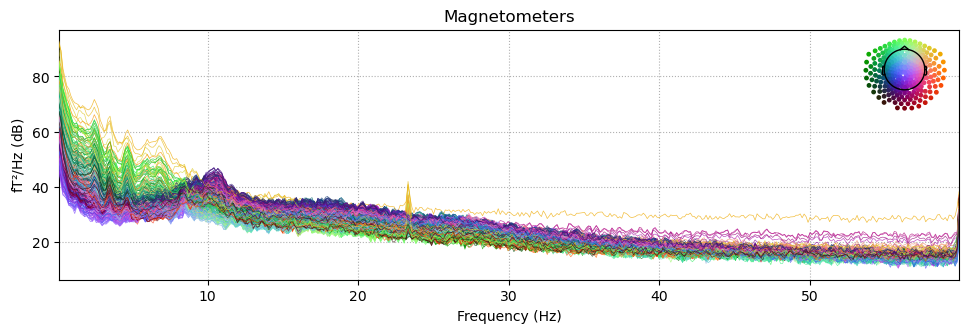

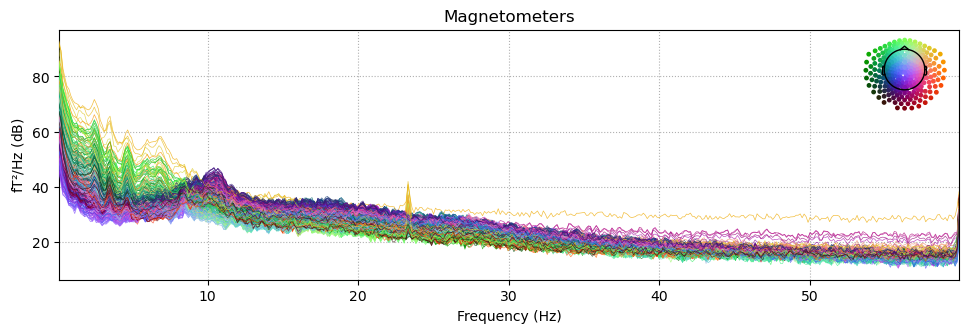

In [4]:
# raw_path = os.path.join(bids_root, "sub-0221/ses-01/meg/sub-0221_ses-01_task-rest_run-01_meg.ds")
# raw_path = os.path.join(bids_root, "sub-CONP0173/ses-02/meg/sub-CONP0173_ses-02_task-rest_run-01_meg.ds")
raw_path = os.path.join(bids_root, "sub-0437/ses-01/meg/sub-0437_ses-01_task-rest_run-01_meg.ds")
raw = mne.io.read_raw_ctf(raw_path, verbose=False).load_data()
raw.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 7.680 (s)


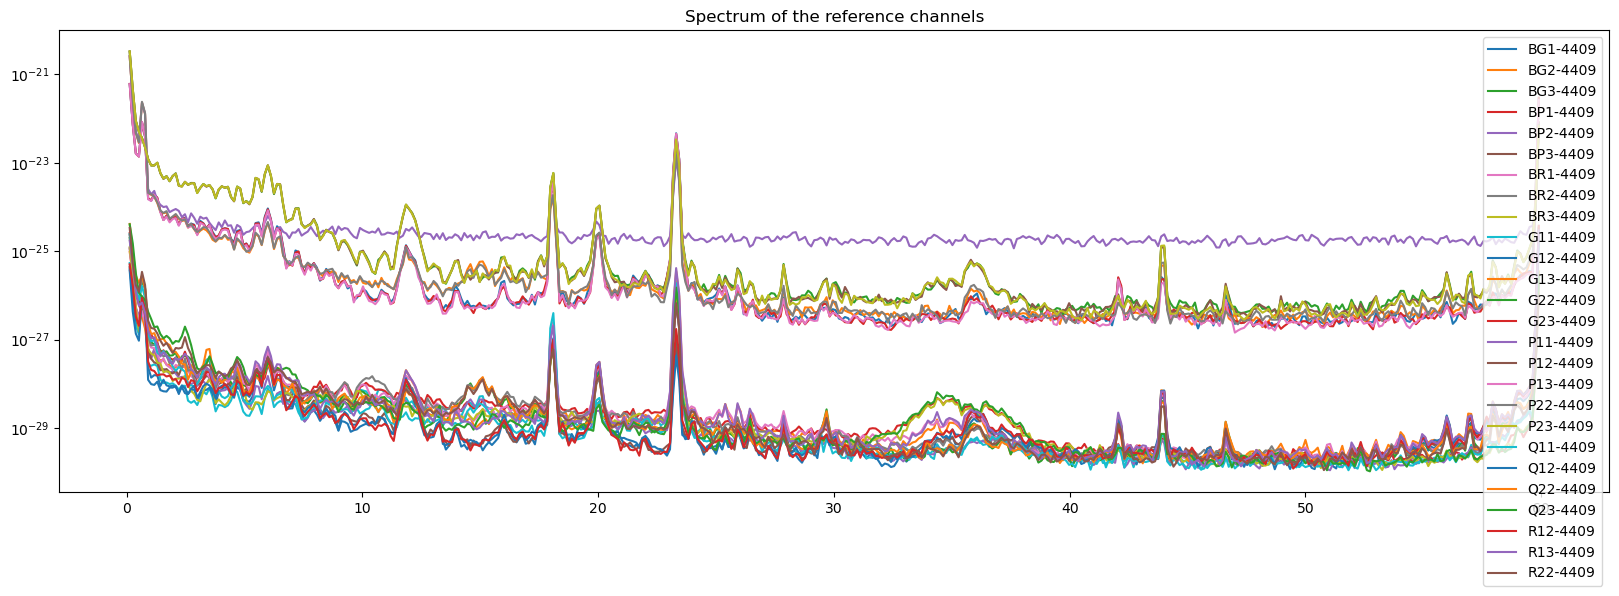

In [4]:
refs = raw.info.ch_names[1:27]
raw_refs = raw.copy().pick_channels(refs)
spectrum, freqs = raw_refs.compute_psd(fmin=0.1, fmax=60, n_fft=2048*9, picks='ref_meg').get_data(return_freqs=True)
plt.close('all')
plt.figure(figsize=(20,6))
for i in range(len(refs)):
    plt.plot(freqs, spectrum[i], label=refs[i])
    plt.yscale('log')
plt.legend()
plt.title('Spectrum of the reference channels')
plt.show()

In [5]:
# Notch filter
raw_notch = raw.copy().notch_filter(60, verbose=False)
# raw_notch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()
# Bandpass fitler
raw_filter = raw_notch.copy().filter(0.1, 49, verbose=False)
# raw_filter.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 7.680 (s)


/tmp/ipykernel_26456/178538195.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_filter.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


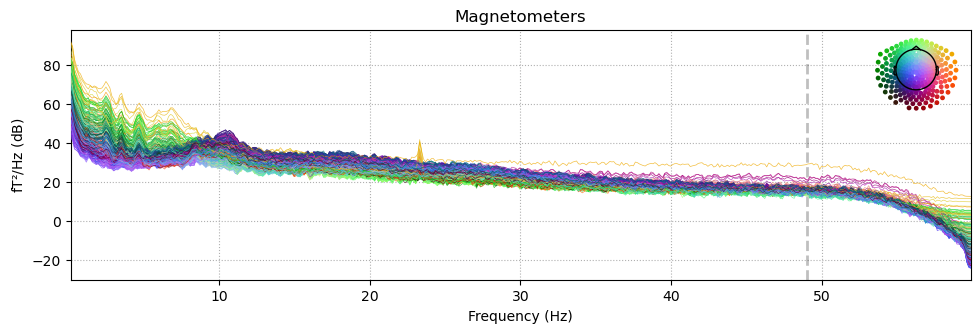

In [6]:
raw_filter.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

# ICA

In [7]:
# raw_sep = raw_filter.copy()
# ica_kwargs = dict(
#     method="picard",
#     fit_params=dict(tol=1e-5),  # use a high tol here for speed
# )

# # Do ICA only on the reference channels.
# ref_picks = mne.pick_types(raw_sep.info, meg=False, ref_meg=True)
# ica_ref = mne.preprocessing.ICA(n_components=26, max_iter="auto", allow_ref_meg=True, **ica_kwargs)
# ica_ref.fit(raw_sep, picks=ref_picks)


In [8]:
# raw_tog = raw_filter.copy()

# all_picks = mne.pick_types(raw_tog.info, meg=True, ref_meg=True)
# ica_tog = mne.preprocessing.ICA(n_components=22, max_iter="auto", allow_ref_meg=True, **ica_kwargs)
# ica_tog.fit(raw_tog, picks=all_picks)

In [9]:
# plt.close('all')
# # Do ICA on both reference and standard channels. Here, we can just reuse
# # ica_tog from the section above.
# ica_sep = ica_tog.copy()

# # Extract the time courses of these components and add them as channels
# # to the raw data. Think of them the same way as EOG/EKG channels, but instead
# # of giving info about eye movements/cardiac activity, they give info about
# # external magnetic noise.
# ref_comps = ica_ref.get_sources(raw_sep)
# for c in ref_comps.ch_names:  # they need to have REF_ prefix to be recognised
#     ref_comps.rename_channels({c: "REF_" + c})
# raw_sep.add_channels([ref_comps])

# # Now that we have our noise channels, we run the separate algorithm.
# bad_comps, scores = ica_sep.find_bads_ref(raw_sep, method="separate")

# # Plot scores with bad components marked.
# # ica_sep.plot_scores(scores, bad_comps)

# # Examine the properties of removed components.
# # ica_sep.plot_properties(raw_sep, picks=bad_comps)

# # Remove the components.
# raw_sep = ica_sep.apply(raw_sep, exclude=bad_comps)

In [10]:
# raw_sep.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

# Compensation

Compensator constructed to change 3 -> 0
Applying compensator to loaded data
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 7.680 (s)


/tmp/ipykernel_26456/810153420.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_comp.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


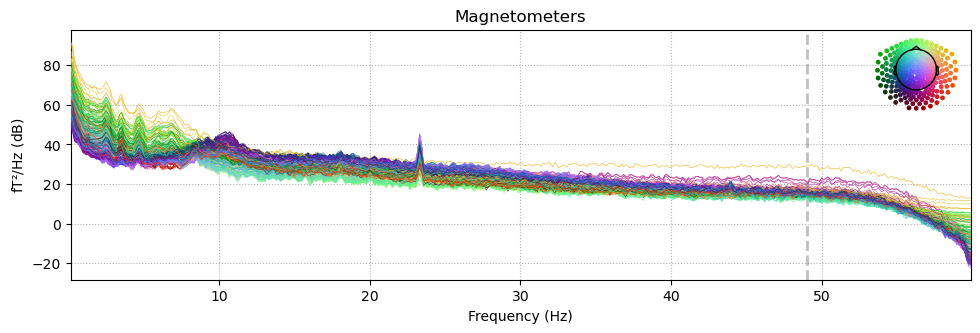

In [11]:
raw_comp = raw_filter.copy()
raw_comp = raw_comp.apply_gradient_compensation(grade=0)
raw_comp.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

# SSP

In [6]:
raw_ssp = raw_filter.copy()
raw_ssp_filt = raw_filter.copy().filter(1, 7)
# raw_ssp_filt =raw_filter.copy().filter(1, 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 7921 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   14.9s finished


In [7]:
projs = mne.compute_proj_raw(raw_ssp_filt, n_mag=20)
# projs = mne.compute_proj_raw(raw_refs, n_mag=3)

Not setting metadata
300 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


No gradiometers found. Forcing n_grad to 0
Adding projection: axial-Raw-0.000-300.000-PCA-01
Adding projection: axial-Raw-0.000-300.000-PCA-02
Adding projection: axial-Raw-0.000-300.000-PCA-03
Adding projection: axial-Raw-0.000-300.000-PCA-04
Adding projection: axial-Raw-0.000-300.000-PCA-05
Adding projection: axial-Raw-0.000-300.000-PCA-06
Adding projection: axial-Raw-0.000-300.000-PCA-07
Adding projection: axial-Raw-0.000-300.000-PCA-08
Adding projection: axial-Raw-0.000-300.000-PCA-09
Adding projection: axial-Raw-0.000-300.000-PCA-10
Adding projection: axial-Raw-0.000-300.000-PCA-11
Adding projection: axial-Raw-0.000-300.000-PCA-12
Adding projection: axial-Raw-0.000-300.000-PCA-13
Adding projection: axial-Raw-0.000-300.000-PCA-14
Adding projection: axial-Raw-0.000-300.000-PCA-15
Adding projection: axial-Raw-0.000-300.000-PCA-16
Adding projection: axial-Raw-0.000-300.000-PCA-17
Adding projection: axial-Raw-0.000-300.000-PCA-18
Adding projection: axial-Raw-0.000-300.000-PCA-19
Adding 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished


In [14]:
projs

[<Projection | axial-Raw-0.000-300.000-PCA-01, active : False, n_channels : 271, exp. var : 62.02%>,
 <Projection | axial-Raw-0.000-300.000-PCA-02, active : False, n_channels : 271, exp. var : 34.12%>,
 <Projection | axial-Raw-0.000-300.000-PCA-03, active : False, n_channels : 271, exp. var : 1.85%>,
 <Projection | axial-Raw-0.000-300.000-PCA-04, active : False, n_channels : 271, exp. var : 0.54%>,
 <Projection | axial-Raw-0.000-300.000-PCA-05, active : False, n_channels : 271, exp. var : 0.33%>,
 <Projection | axial-Raw-0.000-300.000-PCA-06, active : False, n_channels : 271, exp. var : 0.25%>,
 <Projection | axial-Raw-0.000-300.000-PCA-07, active : False, n_channels : 271, exp. var : 0.19%>,
 <Projection | axial-Raw-0.000-300.000-PCA-08, active : False, n_channels : 271, exp. var : 0.13%>,
 <Projection | axial-Raw-0.000-300.000-PCA-09, active : False, n_channels : 271, exp. var : 0.10%>,
 <Projection | axial-Raw-0.000-300.000-PCA-10, active : False, n_channels : 271, exp. var : 0.08%>

In [15]:
raw_ssp.add_proj(projs).apply_proj()

20 projection items deactivated
Created an SSP operator (subspace dimension = 20)
20 projection items activated
SSP projectors applied...


<RawCTF | sub-0437_ses-01_task-rest_run-01_meg.meg4, 331 x 720000 (300.0 s), ~1.78 GB, data loaded>

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 7.680 (s)


/tmp/ipykernel_26456/3865743143.py:2: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_ssp.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


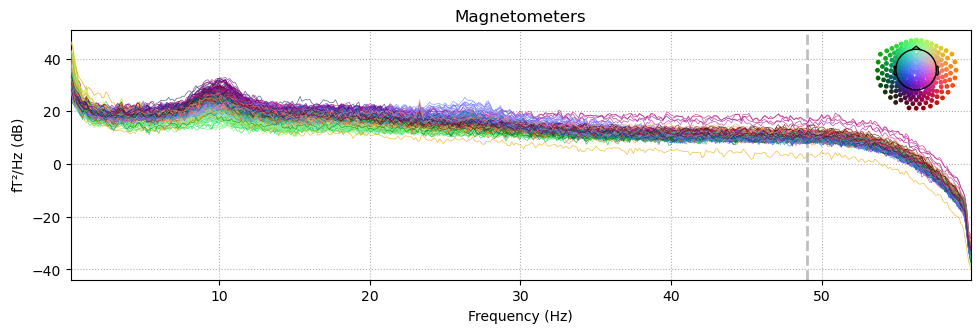

In [16]:
plt.close('all')
raw_ssp.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
20 projection items deactivated
Created an SSP operator (subspace dimension = 20)
20 projection items activated
Using data from preloaded Raw for 8 events and 72001 original time points (prior to decimation) ...
0 bad epochs dropped
SSP projectors applied...
Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_17421/109688541.py:18: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochs.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()


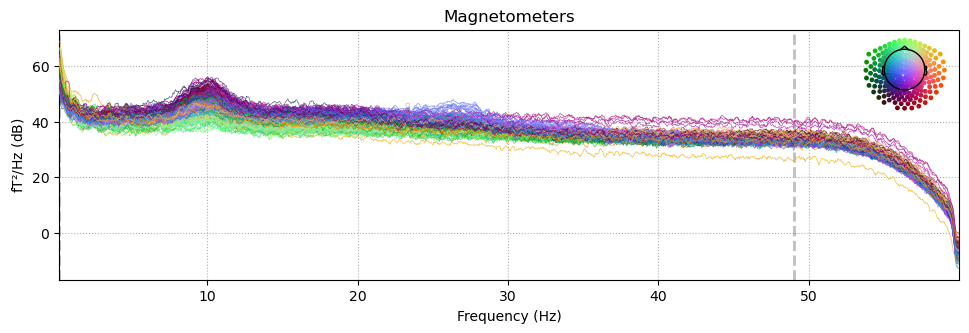

In [8]:
# Epochs
tmax = 30
start = raw_ssp.times[0] + tmax
stop = raw_ssp.times[-1] - tmax
events = mne.make_fixed_length_events(
            raw_filter,
            id=3000,
            start=start,
            duration=tmax,
            overlap=2,
            stop=stop,
        )
event_id = dict(rest=3000)
epochs = mne.Epochs(raw_filter, events, event_id, tmin=0, tmax=tmax, decim=12, baseline=None)

epochs.add_proj(projs).apply_proj()

epochs.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

# Epochs

Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 20)
20 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Using data from preloaded Raw for 8 events and 72001 original time points (prior to decimation) ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_26456/2288239178.py:15: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epochs.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()
/storage/store2/work/amellot/program_files/miniconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


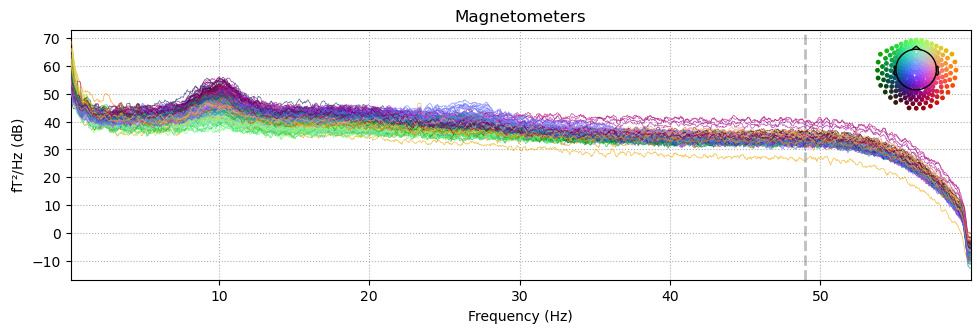

In [17]:
# Epochs
tmax = 30
start = raw_ssp.times[0] + tmax
stop = raw_ssp.times[-1] - tmax
events = mne.make_fixed_length_events(
            raw_ssp,
            id=3000,
            start=start,
            duration=tmax,
            overlap=2,
            stop=stop,
        )
event_id = dict(rest=3000)
epochs = mne.Epochs(raw_ssp, events, event_id, tmin=0, tmax=tmax, decim=12, baseline=None)
epochs.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

# SSP on freq_bands

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_17421/1704647121.py:9: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()


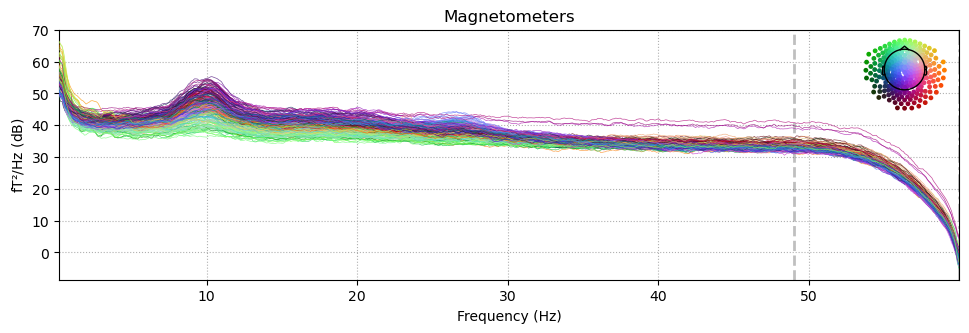

In [21]:
# Test du code ajouté dans mne-bids-pipeline
# Application de la SSP sur sub-0437/ses-01/meg/sub-0437_ses-01_task-rest_run-01_meg.ds avec mne bids pipeline

# Ajout des nouveaux paramètres dans le fichier config

deriv_root = pathlib.Path('/storage/store3/work/kachardo/derivatives/omega')
epoch_path = os.path.join(deriv_root, "sub-0437/ses-01/meg/sub-0437_ses-01_task-rest_proc-ssp_epo.fif")
epoch = mne.read_epochs(epoch_path, verbose=False).load_data()
epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_17421/2237522714.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()


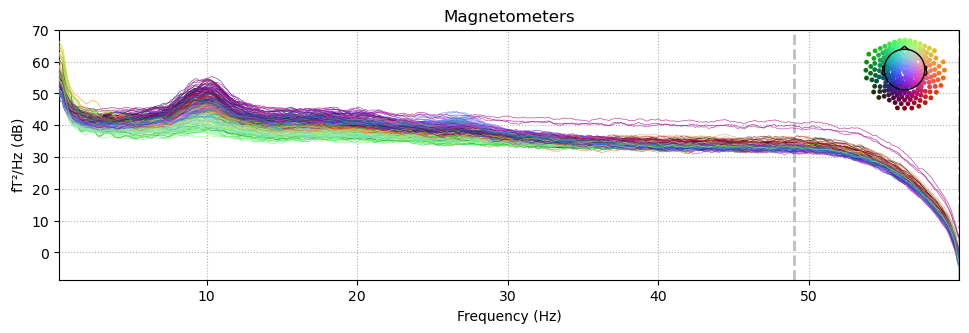

In [22]:
epoch_path = os.path.join(deriv_root, "sub-0437/ses-01/meg/sub-0437_ses-01_task-rest_proc-clean_epo.fif")
epoch = mne.read_epochs(epoch_path, verbose=False).load_data()
epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

# Test on a bad subject

Reading 0 ... 719999  =      0.000 ...   300.000 secs...
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 7.680 (s)


/tmp/ipykernel_17421/820429494.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()


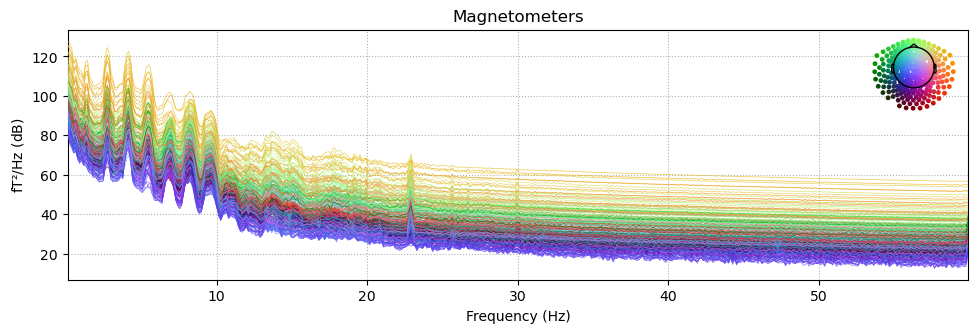

In [24]:
raw_path = os.path.join(bids_root, "sub-CONP0173/ses-02/meg/sub-CONP0173_ses-02_task-rest_run-01_meg.ds")
raw = mne.io.read_raw_ctf(raw_path, verbose=False).load_data()
raw.compute_psd(fmin=0.1, fmax=60, picks='meg', n_fft=2048*9).plot()

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_17421/3202496872.py:4: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()


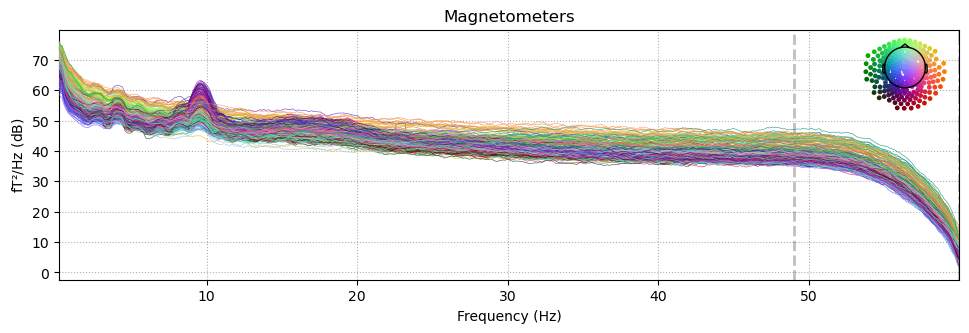

In [25]:
deriv_root = pathlib.Path('/storage/store3/work/kachardo/derivatives/omega')
epoch_path = os.path.join(deriv_root, "sub-CONP0173/ses-02/meg/sub-CONP0173_ses-02_task-rest_proc-ssp_epo.fif")
epoch = mne.read_epochs(epoch_path, verbose=False).load_data()
epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()

Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/tmp/ipykernel_17421/948994336.py:3: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()


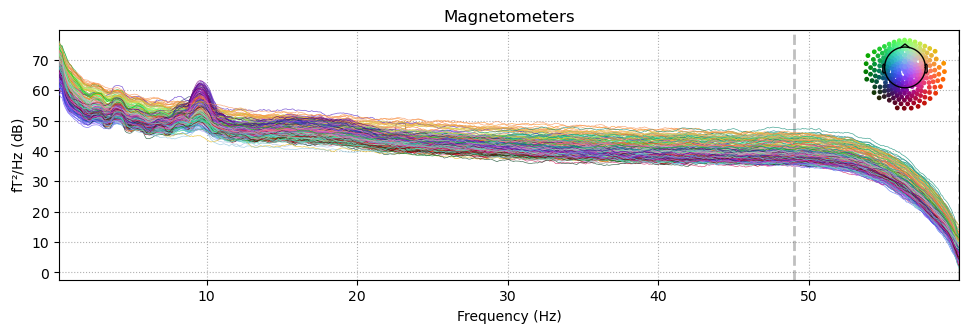

In [26]:
epoch_path = os.path.join(deriv_root, "sub-CONP0173/ses-02/meg/sub-CONP0173_ses-02_task-rest_proc-clean_epo.fif")
epoch = mne.read_epochs(epoch_path, verbose=False).load_data()
epoch.compute_psd(fmin=0.1, fmax=60, picks='meg').plot()